# Matplotlib
## Basics

Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/escape2020/school2022](https://github.com/escape2020/school2022)

In [1]:
%matplotlib inline
import matplotlib as ml
import numpy as np
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

print(f"Python version: {sys.version}\n"
      f"NumPy version: {np.__version__}\n"
      f"Matplotlib version: {ml.__version__}\n")

rng = np.random.default_rng(42)  # initialise our random number generator

Python version: 3.9.12 (main, Mar 26 2022, 15:44:31) 
[Clang 13.1.6 (clang-1316.0.21.2)]
NumPy version: 1.22.4
Matplotlib version: 3.5.2



In [2]:
n = 100
xs = np.linspace(0, 2*np.pi, n)
ys = np.sinc(xs)

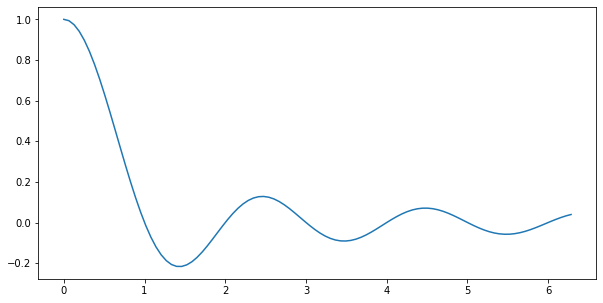

In [3]:
plt.plot(xs, ys)

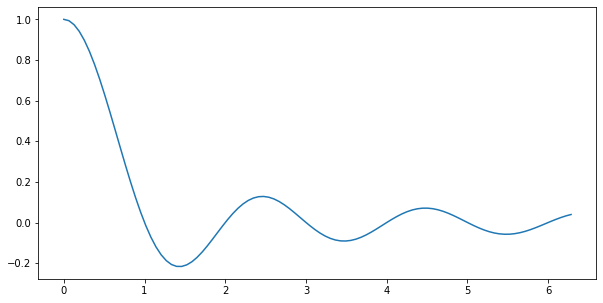

In [4]:
plot = plt.plot(xs, ys)

In [5]:
plot

In [6]:
fig = plt.figure()

<Figure size 720x360 with 0 Axes>

In [7]:
ax = fig.add_axes([0, 0, 1, 1])

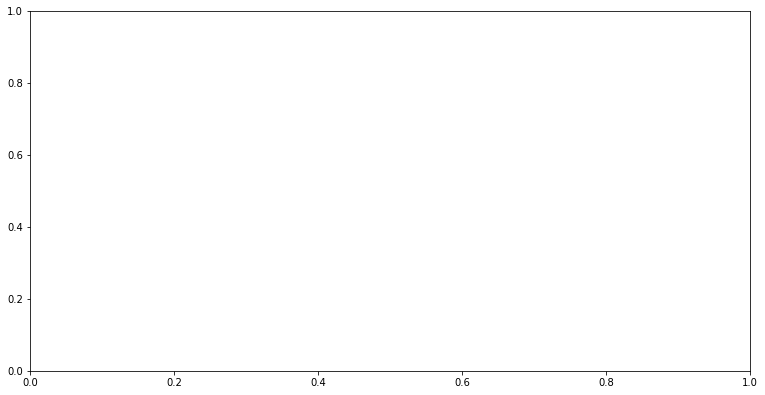

In [8]:
fig

In [9]:
ax.scatter(xs, ys, label="sensor Q")

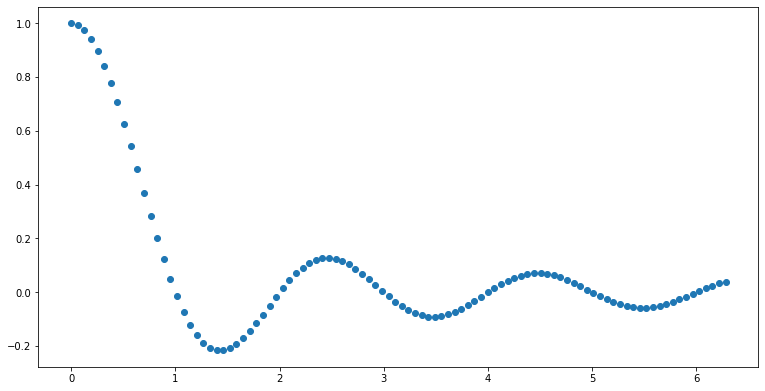

In [10]:
fig

In [11]:
sub_ax = fig.add_axes([0.5, 0.5, 0.4, 0.4])

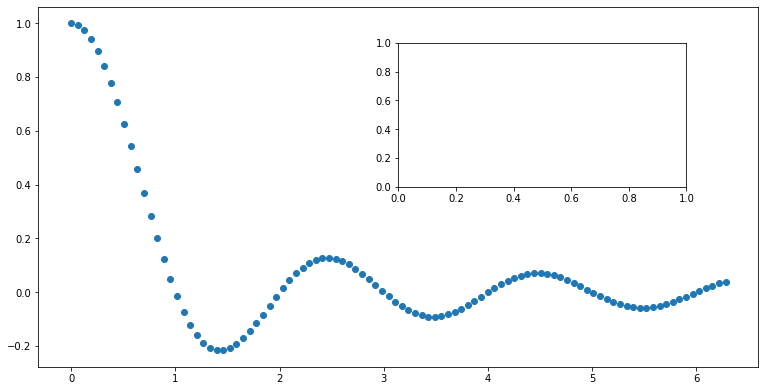

In [12]:
fig

In [13]:
sub_ax.plot(xs, np.sin(xs), color="salmon", label="sensor P")
sub_ax.plot(xs, np.sin(xs)*0.9, color="steelblue", linestyle="-.", label="lower/upper")

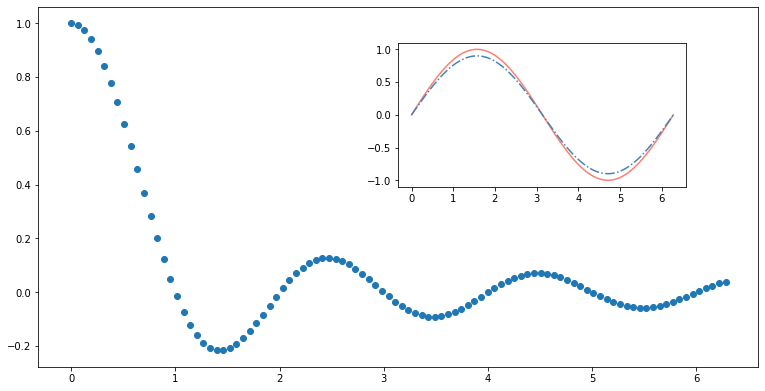

In [14]:
fig

In [15]:
ax.set_xlabel("time [s]")
ax.set_ylabel("voltage [mV]")

Text(3.200000000000003, 0.5, 'voltage [mV]')

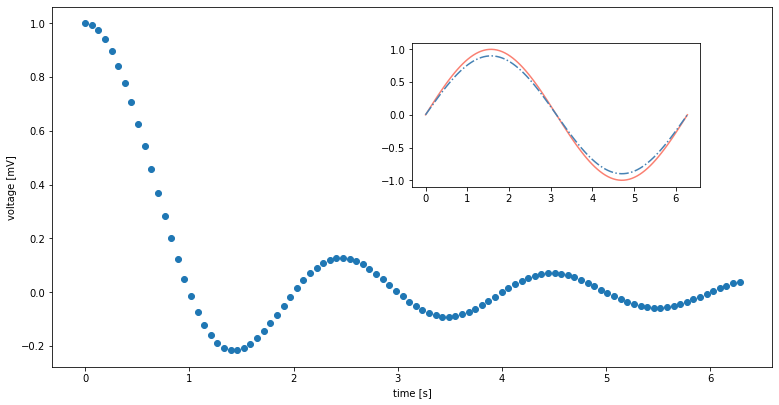

In [16]:
fig

In [17]:
sub_ax.set_xlabel("time [s]")
sub_ax.set_ylabel(r"current [$\mu$A]")

Text(377.2, 0.5, 'current [$\\mu$A]')

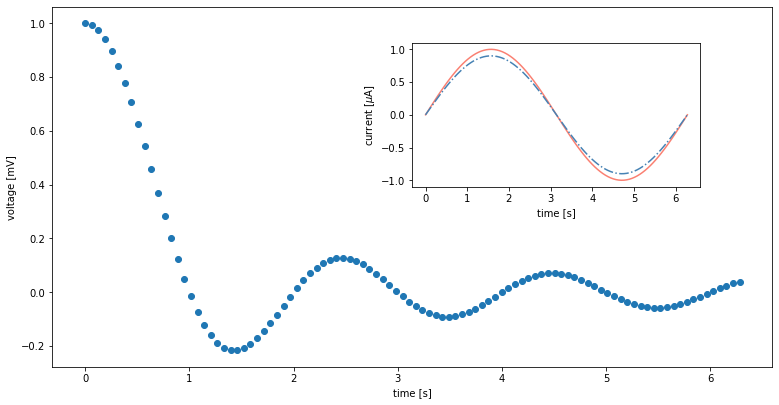

In [18]:
fig

In [19]:
ax.legend()

In [20]:
sub_ax.legend()

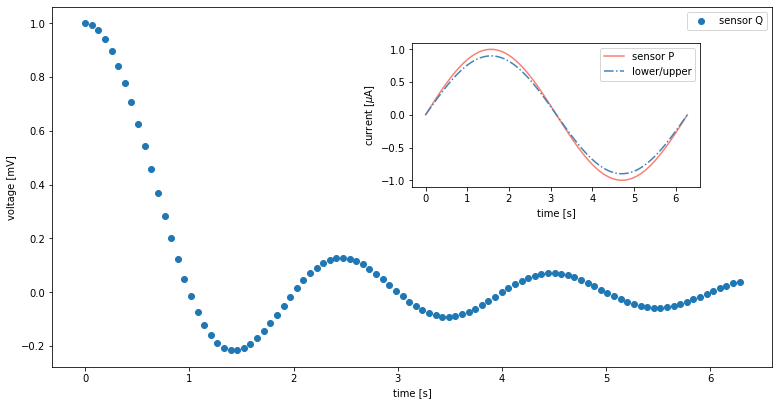

In [21]:
fig

In [22]:
ax.axhline(0.15, linestyle=":", color="#aabbcc")

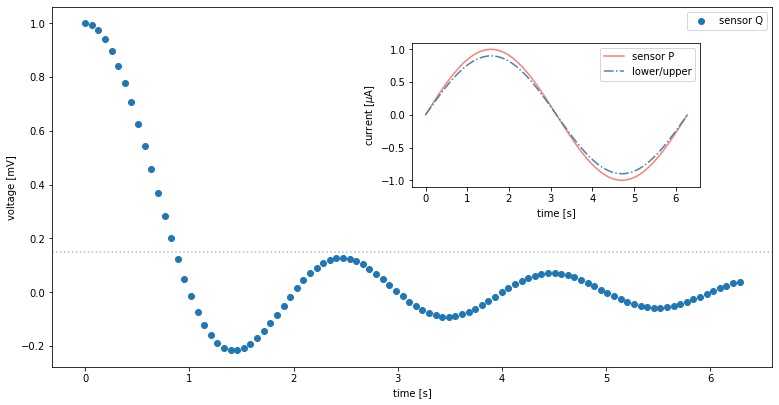

In [23]:
fig

In [24]:
toi = 2.13  # time [s]

In [25]:
opts = dict(linestyle="-", color="deepskyblue", linewidth=2)
ax.axvline(toi, **opts)
sub_ax.axvline(toi, **opts)

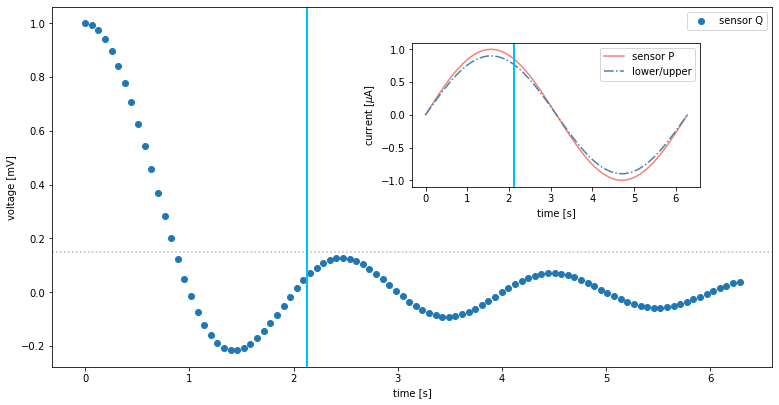

In [26]:
fig

In [27]:
ax.grid(color="#dddddd")
sub_ax.grid(color="slategrey")

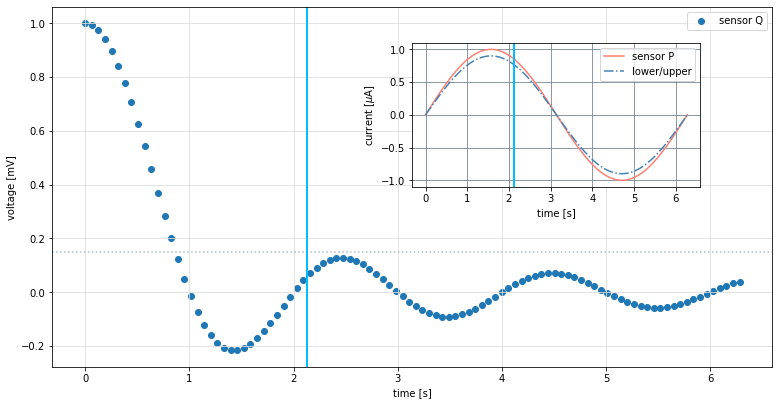

In [28]:
fig

In [29]:
for axis in [ax.xaxis, ax.yaxis]:
    axis.label.set_fontsize(20)

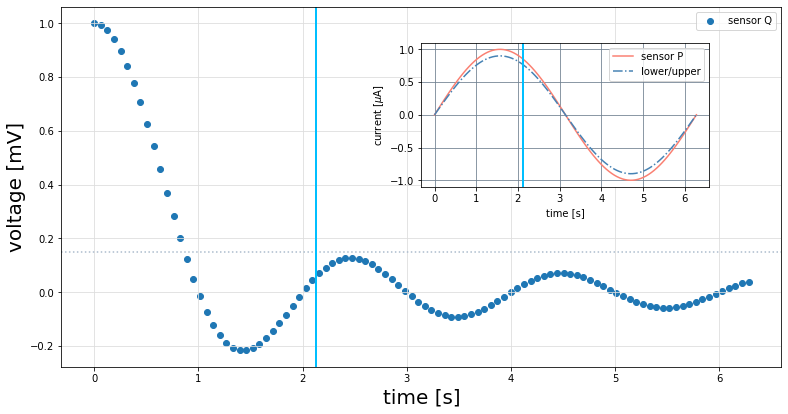

In [30]:
fig

In [31]:
sub_ax.set_position([0.45, 0.4, 0.52, 0.5])

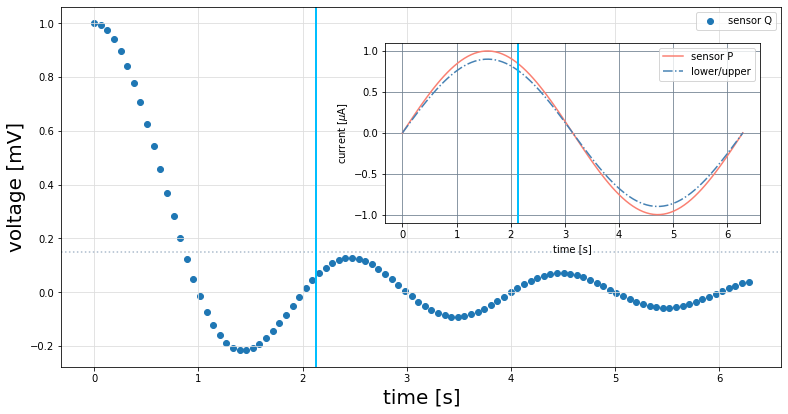

In [32]:
fig

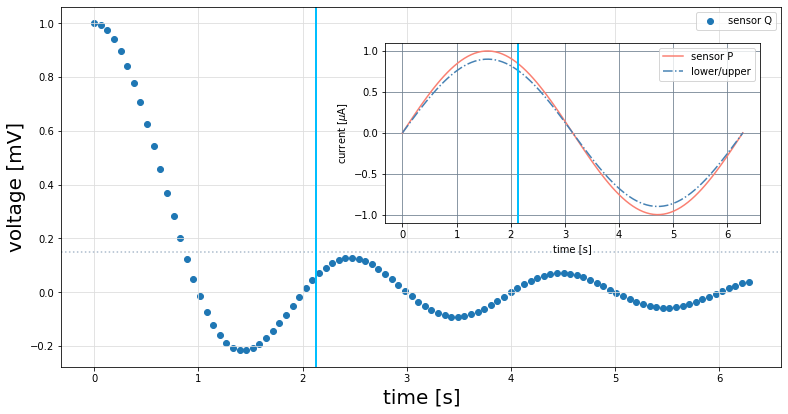

In [33]:
fig

In [34]:
import scipy.signal

In [35]:
peak_idx = scipy.signal.find_peaks_cwt(ys, np.arange(1, 5))

In [36]:
peak_idx

array([ 1,  2,  3,  4, 38, 70, 71, 98])

In [37]:
ax.scatter(xs[peak_idx], ys[peak_idx], c="red", marker="X", s=100)

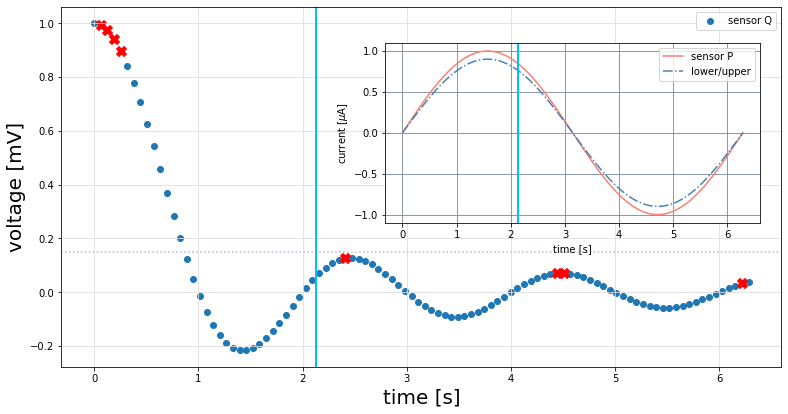

In [38]:
fig

In [39]:
fig.savefig("the_plot.pdf", bbox_inches="tight")  # the filename extension defines the media type

In [40]:
fig.savefig("the_plot.png", bbox_inches="tight")

## Working with subplots

The `plt.subplots()` utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

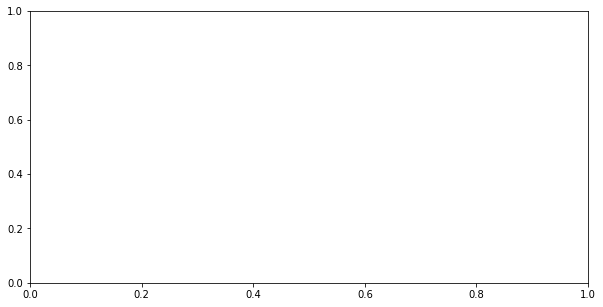

In [41]:
fig, ax = plt.subplots()  # a one-shot to create a figure with an axes

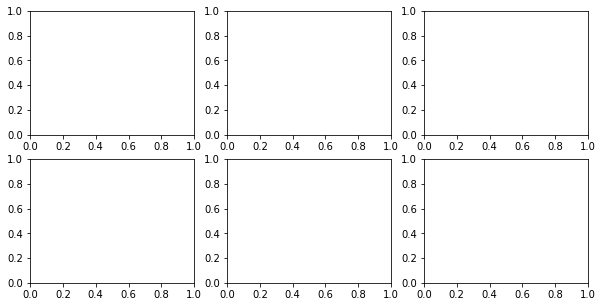

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=3)

In [43]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [44]:
axes[0]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [45]:
axes[1]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [46]:
axes[0, 2].scatter(xs, np.cos(xs))

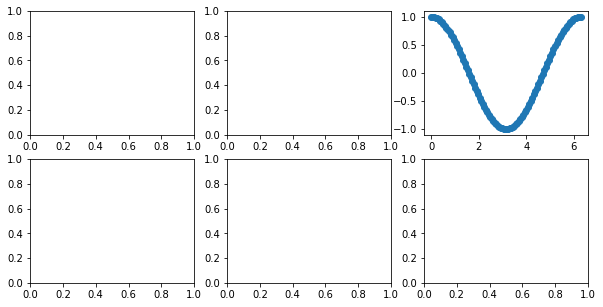

In [47]:
fig

In [48]:
axes.flat[4].scatter(xs, ys)

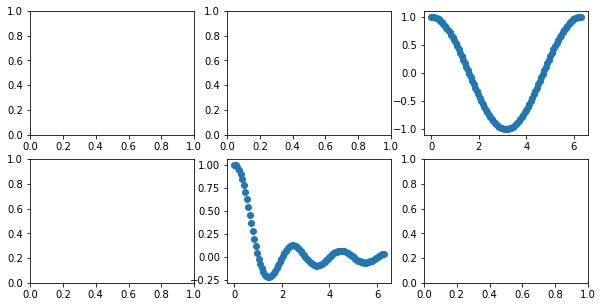

In [49]:
fig

In [50]:
colors = plt.cm.viridis(np.linspace(0, 1, len(axes.flat)))

for func, ax, color in zip([np.cos, np.sin, np.sinc, np.tan, np.tanh, np.exp], axes.flat, colors):
    ax.plot(xs, func(xs), color=color)

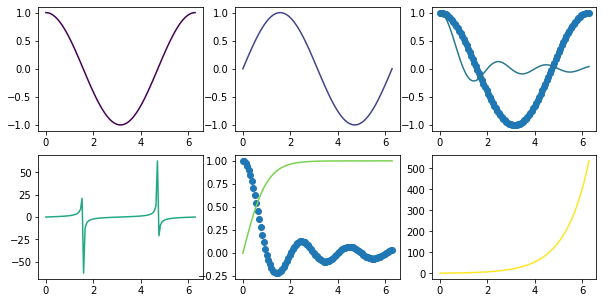

In [51]:
fig

In [52]:
plt.cm.viridis(np.linspace(0, 1, len(axes.flat)))

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.253935, 0.265254, 0.529983, 1.      ],
       [0.163625, 0.471133, 0.558148, 1.      ],
       [0.134692, 0.658636, 0.517649, 1.      ],
       [0.477504, 0.821444, 0.318195, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [53]:
plt.cm.viridis(0.5)

(0.127568, 0.566949, 0.550556, 1.0)

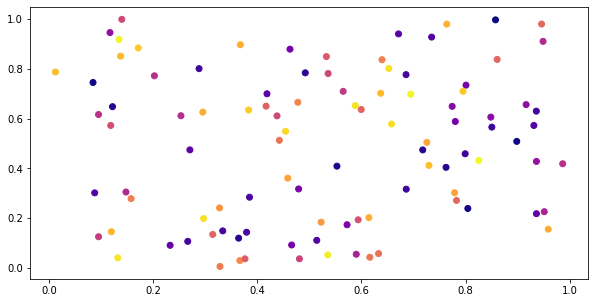

In [54]:
fig, ax = plt.subplots()
n = 100
xs = rng.random(n)
ys = rng.random(n)
ms = rng.random(n)
ax.scatter(rng.random(n), rng.random(n), c=ms, cmap="plasma")

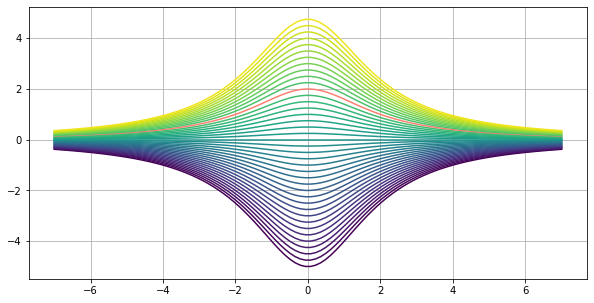

In [55]:
fig, ax = plt.subplots()

n = 100
xs = np.linspace(-7, 7, n)

N = 40
colors = iter(plt.cm.viridis(np.linspace(0, 1, N)))

for k in range(-N//2, N//2):
    color = "salmon" if k == 8 else next(colors)
    ax.plot(xs, k / (xs**2 + 4), c=color)
    
ax.grid()

## Histograms

In [56]:
data1 = rng.normal(23, 5, 1000)
data2 = rng.normal(42, 5, 10000)

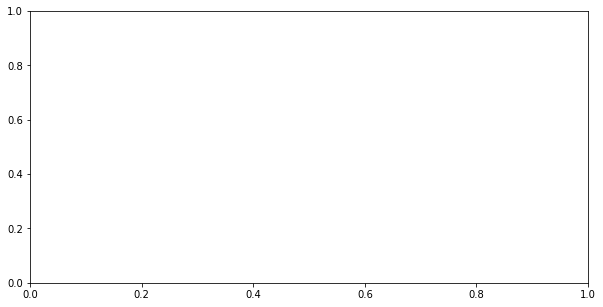

In [57]:
fig, ax = plt.subplots()

In [58]:
ax.hist(data1, bins=100)
ax.hist(data2, bins=100)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   1.,   3.,   8.,   4.,   4.,   6.,  15.,  12.,  11.,
         11.,  21.,  21.,  27.,  34.,  28.,  48.,  50.,  85.,  82.,  93.,
         99., 107., 137., 159., 143., 176., 197., 215., 187., 242., 260.,
        272., 298., 317., 298., 308., 359., 328., 361., 342., 327., 321.,
        297., 298., 306., 306., 273., 251., 256., 210., 185., 198., 196.,
        158., 131., 121., 122.,  96.,  91.,  75.,  74.,  55.,  55.,  46.,
         33.,  24.,  18.,  22.,  16.,  13.,  10.,   8.,  10.,   4.,   2.,
          7.,   4.,   4.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([20.05442708, 20.47517401, 20.89592094, 21.31666787, 21.7374148 ,
        22.15816173, 22.57890866, 22.9996556 , 23.42040253, 23.84114946,
        24.26189639, 24.68264332, 25.10339025, 25.52413718, 25.94488411,
        26.36563105, 26.78637798, 27.20712491, 27.62787184, 28.04861877,
        28.4693657 , 28.89

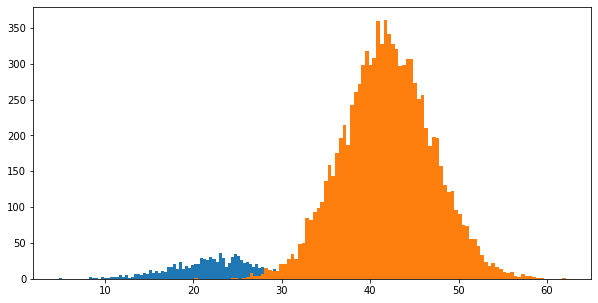

In [59]:
fig

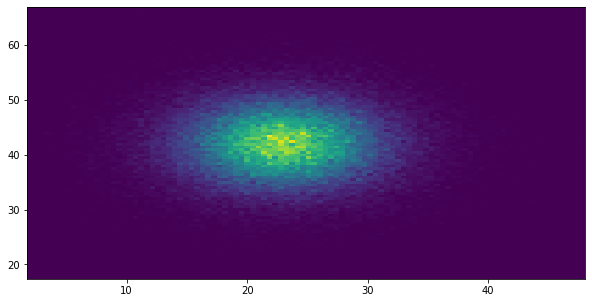

In [60]:
N = 100000

data1 = rng.normal(23, 5, N)
data2 = rng.normal(42, 5, N)

fig, ax = plt.subplots()

ax.hist2d(data1, data2, bins=100);